# Exploratory Data Analysis on `'Pima Indians Diabetes Database'`

>this material is intended as an introduction to pandas and its tools for exploratory data analysis

In [1]:
# 2022-10-27-T1533Z
# SPDX-Identifier: BSD-3-Clause
# License: BSD-3-Clause
# Copyright (c) 2022. Milo Dubois.

## import libraries and load data to pandas `DataFrame`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data into pandas `DataFrame`
df = pd.read_csv('../../datasets/niddk/diabetes-pima/pima-diabetes-database.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# optional
# we got this info from `df.info()`

df.shape

(768, 9)

In [6]:
# optional
# check for NaN by column
# removed, this is redundant, remove, `df.info()` tell us this
# df.isnull().sum()
# TODO: note, this is impt for other datasets

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# initial correlation probing
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
cormat = df.corr()
top_corr_features = cormat.index

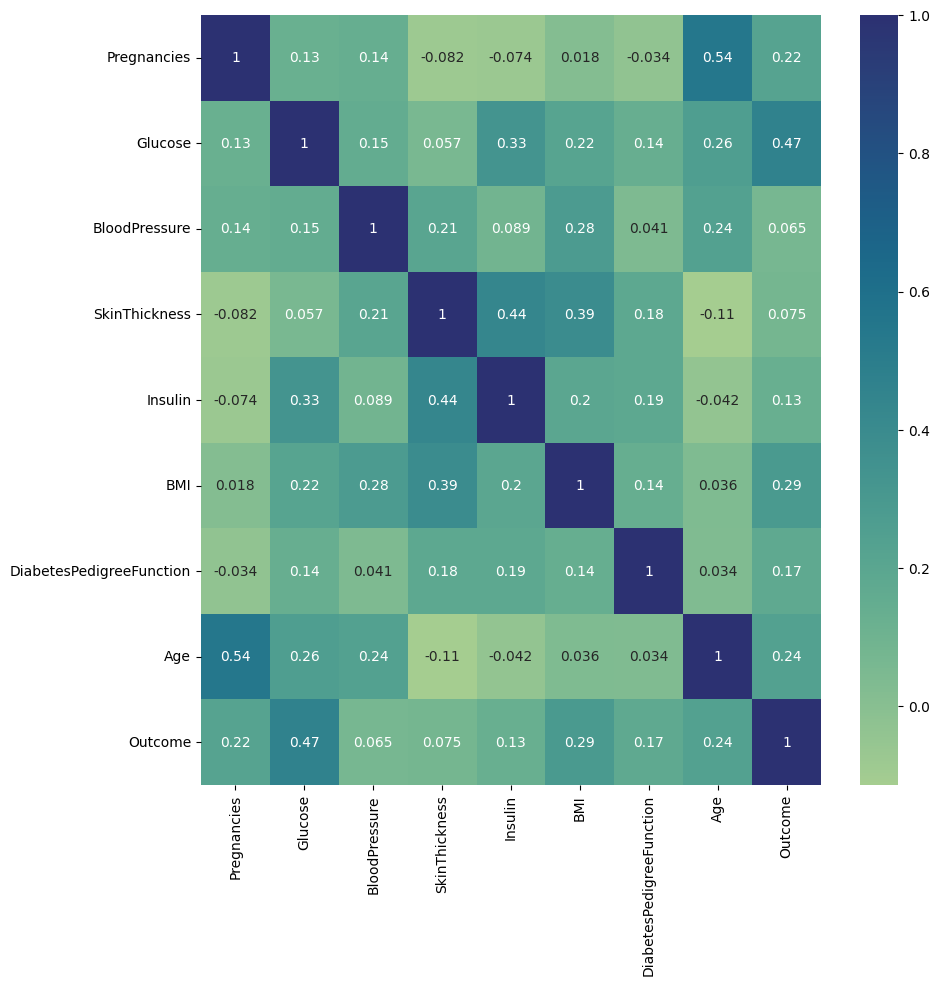

In [13]:
plt.figure(figsize=(10,10))
p = sns.heatmap(df[top_corr_features].corr(), annot=True,cmap='crest')

# TODO: rocket or crest better than mako and viridis in this application
# TODO: label as `Figure 001.1`

_N.B._, we have a preliminary picture of the most important features for our ML/prediction pipeline, but we will train and test using appropriate mechanisms first.

For example, here are just a few of the observations (not all, by any means) we can draw from the initial exploratory analyses:

* `BMI` seems to be correlated to (in decreasing oder):
    * `SkinThickness`, 
    * `BloodPressure`, 
    * `Outcome`, and 
    * `Glucose`

* `Age` and `Pregnancies` seem tighly correlated

(_these all may be potentially good features to explore, but we need to do some more analyses!_)

Also, we _should_ have some questions about the computed correlations in context of our knowledge of pathophysiology and clinical biochemistry at this point. If not, we don't have our thinking caps on.

## next, let's choose features